# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress
import scipy.stats as st

# Import API key
import config_from_pydata_env

weather_api_key = config_from_pydata_env.weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

624

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# url for openweather api
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# build query url
query_url = f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
# empty lists to hold query information
lat = []
temp = []
temp_max = []
humidity = []
wind_speed = []
lon = []
date = []
country = []
cloudiness = []


# loop through list of cities and request information
count = 0
set = 1
for city in cities:
    count = count + 1
    # using sleep here to not reach api limit
    if count == 51:
        count = 1
        set = set + 1
        time.sleep(5)
    print(f"Processing Record {count} of Set {set} | {city}")
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp'])
        temp_max.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
        cloudiness.append(response['clouds']['all'])
    except:
        print("City not found. Skipping...")
        lat.append(np.nan)
        lon.append(np.nan)
        temp.append(np.nan)
        temp_max.append(np.nan)
        humidity.append(np.nan)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)
        cloudiness.append(np.nan)
    continue
print("Data Retrieval Complete")

Processing Record 1 of Set 1 | kapaa
Processing Record 2 of Set 1 | saleaula
City not found. Skipping...
Processing Record 3 of Set 1 | matale
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | bluff
Processing Record 6 of Set 1 | cape town
Processing Record 7 of Set 1 | sechura
Processing Record 8 of Set 1 | hilo
Processing Record 9 of Set 1 | henties bay
Processing Record 10 of Set 1 | maine-soroa
Processing Record 11 of Set 1 | qaanaaq
Processing Record 12 of Set 1 | havelock
Processing Record 13 of Set 1 | saskylakh
Processing Record 14 of Set 1 | denpasar
Processing Record 15 of Set 1 | saint anthony
Processing Record 16 of Set 1 | trairi
Processing Record 17 of Set 1 | teguise
Processing Record 18 of Set 1 | husavik
Processing Record 19 of Set 1 | scarborough
Processing Record 20 of Set 1 | necochea
Processing Record 21 of Set 1 | deer lake
Processing Record 22 of Set 1 | capao da canoa
Processing Record 23 of Set 1 | tuktoyaktuk
Processing Record 24 of Set 1 

Processing Record 44 of Set 4 | paramonga
Processing Record 45 of Set 4 | saint george
Processing Record 46 of Set 4 | pauini
Processing Record 47 of Set 4 | baykit
Processing Record 48 of Set 4 | bokspits
City not found. Skipping...
Processing Record 49 of Set 4 | shagonar
Processing Record 50 of Set 4 | yulara
Processing Record 1 of Set 5 | tuensang
Processing Record 2 of Set 5 | ambon
Processing Record 3 of Set 5 | ixtapa
Processing Record 4 of Set 5 | ciudad bolivar
Processing Record 5 of Set 5 | omsukchan
Processing Record 6 of Set 5 | esperance
Processing Record 7 of Set 5 | te anau
Processing Record 8 of Set 5 | longyearbyen
Processing Record 9 of Set 5 | chapais
Processing Record 10 of Set 5 | iskateley
Processing Record 11 of Set 5 | los alamos
Processing Record 12 of Set 5 | alyangula
Processing Record 13 of Set 5 | dingle
Processing Record 14 of Set 5 | fort wellington
Processing Record 15 of Set 5 | lithakia
Processing Record 16 of Set 5 | vao
Processing Record 17 of Set 5 

Processing Record 35 of Set 8 | sydney
Processing Record 36 of Set 8 | palu
Processing Record 37 of Set 8 | carman
Processing Record 38 of Set 8 | kahului
Processing Record 39 of Set 8 | garowe
Processing Record 40 of Set 8 | skibotn
Processing Record 41 of Set 8 | gabu
Processing Record 42 of Set 8 | saint andrews
Processing Record 43 of Set 8 | florianopolis
Processing Record 44 of Set 8 | airai
Processing Record 45 of Set 8 | vestmannaeyjar
Processing Record 46 of Set 8 | baruun-urt
Processing Record 47 of Set 8 | souillac
Processing Record 48 of Set 8 | mahadday weyne
City not found. Skipping...
Processing Record 49 of Set 8 | roma
Processing Record 50 of Set 8 | tocopilla
Processing Record 1 of Set 9 | nizhneyansk
City not found. Skipping...
Processing Record 2 of Set 9 | buraydah
Processing Record 3 of Set 9 | talaya
Processing Record 4 of Set 9 | barra
Processing Record 5 of Set 9 | faya
Processing Record 6 of Set 9 | tiksi
Processing Record 7 of Set 9 | krasnoarmeysk
Processing

Processing Record 23 of Set 12 | greencastle
Processing Record 24 of Set 12 | aksarayskiy
Processing Record 25 of Set 12 | xining
Processing Record 26 of Set 12 | thinadhoo
Processing Record 27 of Set 12 | sayula
Processing Record 28 of Set 12 | buchanan
Processing Record 29 of Set 12 | hurricane
Processing Record 30 of Set 12 | ishigaki
Processing Record 31 of Set 12 | san marcos
Processing Record 32 of Set 12 | rawson
Processing Record 33 of Set 12 | kamiiso
Processing Record 34 of Set 12 | mount gambier
Processing Record 35 of Set 12 | trebinje
Processing Record 36 of Set 12 | kudahuvadhoo
Processing Record 37 of Set 12 | tres arroyos
Processing Record 38 of Set 12 | avera
Processing Record 39 of Set 12 | batagay
Processing Record 40 of Set 12 | itupiranga
Processing Record 41 of Set 12 | road town
Processing Record 42 of Set 12 | port augusta
Processing Record 43 of Set 12 | maragogi
Processing Record 44 of Set 12 | mimongo
Processing Record 45 of Set 12 | hambantota
Processing Rec

In [5]:
len(lat)

624

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
# convert raw data to dataframe
city_weather_df = pd.DataFrame({
    "City": cities,
    "Lat": lat,
    "Lng": lon,
    "Max Temp": temp_max,
    "Humidity": humidity,
    "Cloudiness": cloudiness,
    "Wind Speed": wind_speed,
    "Country": country,
    "Date": date,
})

# drop cities that were skipped because they could not be found by the api
city_weather_df = city_weather_df.dropna(how="any")

In [7]:
# export the city data into a .csv file within a folder named output_data
city_weather_df.to_csv("./output_data/city_weather_data.csv", index=False)

# display the dataframe
city_weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kapaa,22.08,-159.32,73.00,79.0,46.0,8.55,US,1.603212e+09
2,matale,7.47,80.62,72.07,86.0,10.0,4.54,LK,1.603212e+09
3,hermanus,-34.42,19.23,60.01,71.0,0.0,1.99,ZA,1.603212e+09
4,bluff,-46.60,168.33,43.00,88.0,92.0,12.77,NZ,1.603212e+09
5,cape town,-33.93,18.42,62.60,51.0,2.0,17.22,ZA,1.603212e+09
...,...,...,...,...,...,...,...,...,...
619,biak,-0.91,122.88,76.53,70.0,81.0,7.00,ID,1.603212e+09
620,cozumel,20.51,-86.95,84.20,83.0,75.0,3.36,MX,1.603212e+09
621,comodoro rivadavia,-45.87,-67.50,53.60,46.0,0.0,12.75,AR,1.603212e+09
622,rudbar,30.15,62.60,60.80,27.0,0.0,4.54,AF,1.603212e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
#  Get the indices of cities that have humidity over 100%.


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

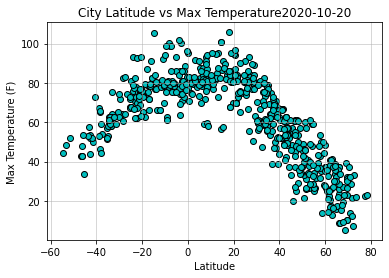

In [10]:
# set date time variable for title
date_time = datetime.date(datetime.now())

# create latitude vs temperature scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Max Temp"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Max Temperature{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel("Max Temperature (F)")

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_temperature.png")

# show the scatterplot
plt.show()

## Latitude vs. Humidity Plot

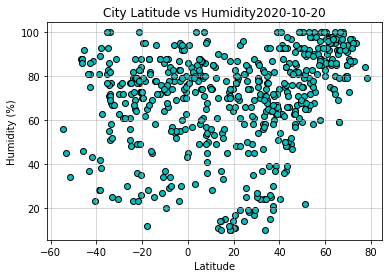

In [11]:
# create latitude vs humidity scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Humidity"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Humidity{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Humidity (%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_humidity.png")

# show the scatterplot
plt.show()

## Latitude vs. Cloudiness Plot

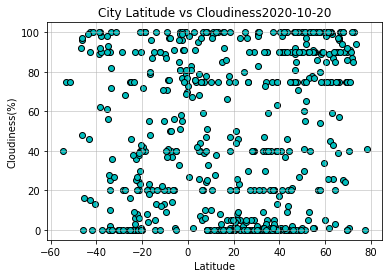

In [12]:
# create latitude vs cloudiness scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Cloudiness"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Cloudiness{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Cloudiness(%)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_cloudiness.png")

# show the scatterplot
plt.show()

## Latitude vs. Wind Speed Plot

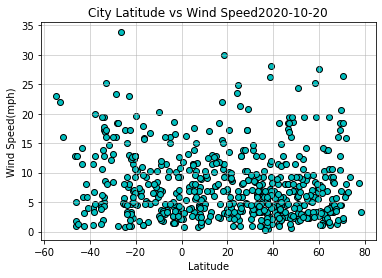

In [13]:
# create latitude vs wind speed scatter plot
plt.scatter(city_weather_df["Lat"], city_weather_df["Wind Speed"], facecolor = "c", edgecolor = "k")

# set title
plt.title(f"City Latitude vs Wind Speed{date_time}")

# set x axis label
plt.xlabel("Latitude")

# set y axis label
plt.ylabel('Wind Speed(mph)')

# set grid line
plt.grid(linestyle='-', linewidth=1, alpha = 0.5)

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/city_latitude_wind_speed.png")

# show the scatterplot
plt.show()

## Linear Regression

In [14]:
# northern and southern hemisphere dataframes
northern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] >= 0]
southern_hemisphere = city_weather_df.loc[city_weather_df["Lat"] < 0]

# define linear regression and scatterplot function
def linear_regression(x,y):
    print(f"The r-squared is : {round(st.pearsonr(x, y)[0],2)}")
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

# function for annotation
def annotate(line_eq, a, b):
    plt.annotate(line_eq,(a,b),fontsize=15,color="red")

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : -0.88


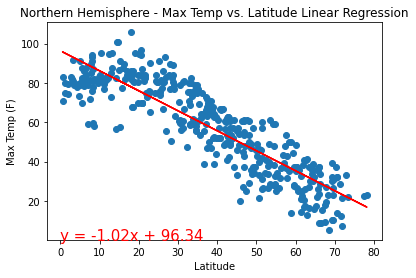

In [15]:
# use linear regression function for northern hempisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Max Temp"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Max Temp (F)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_temp_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is : 0.76


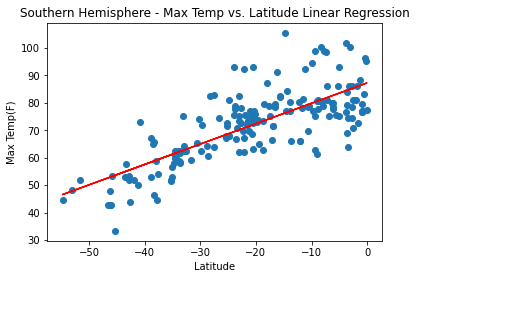

In [16]:
# use linear regression function for southern hempisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Max Temp"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Max Temp(F)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_temp_lat_regression.png")

# show the plot
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.39


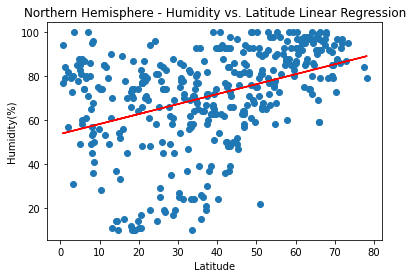

In [17]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Humidity"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Humidity vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Humidity(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_humidity_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is : 0.04


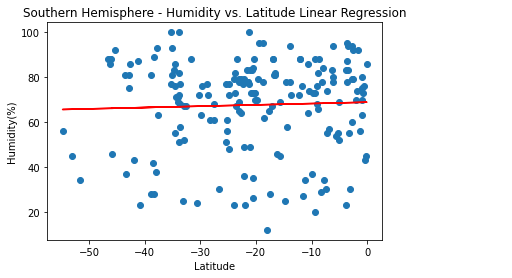

In [18]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Humidity"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Humidity vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Humidity(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_humidity_lat_regression.png")

# show the plot
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.29


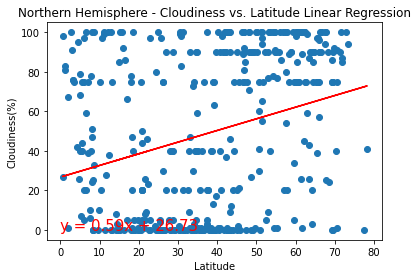

In [19]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Cloudiness"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Cloudiness(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_cloudiness_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is : 0.12


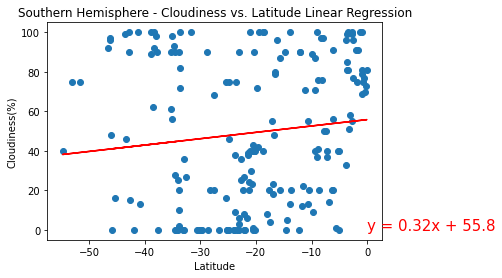

In [20]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Cloudiness"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Southern Hemisphere - Cloudiness vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Cloudiness(%)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_cloudiness_lat_regression.png")

# show the plot
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.03


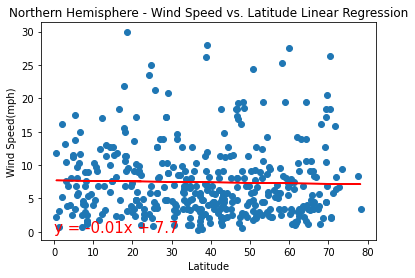

In [21]:
# use linear regression function for northern hemisphere analysis
equation = linear_regression(northern_hemisphere["Lat"], northern_hemisphere["Wind Speed"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Wind Speed(mph)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/northern_wind_speed_lat_regression.png")

# show the plot
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is : -0.23


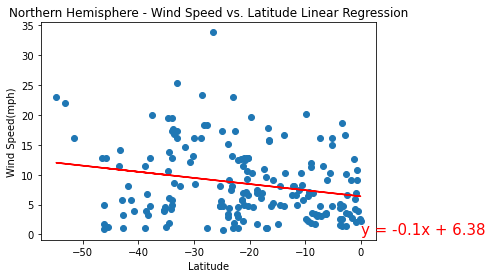

In [22]:
# use linear regression function for southern hemisphere analysis
equation = linear_regression(southern_hemisphere["Lat"], southern_hemisphere["Wind Speed"])

# annotate
annotate(equation, 0, 0)

# title for plot
plt.title("Northern Hemisphere - Wind Speed vs. Latitude Linear Regression")

# set xlabel
plt.xlabel("Latitude")

# set ylabel
plt.ylabel("Wind Speed(mph)")

# save the plotted figure as a png file in output data folder
plt.savefig("./output_data/southern_wind_speed_lat_regression.png")

# show the plot
plt.show()